#Expected CTC Prediction
**Problem Statement:**
The HR department of Company X wants to predict the salary (Expected CTC) to be offered
to a new candidate based on historical data of previous applicants.

**Objective:**
To build a machine learning model that predicts Expected CTC fairly and consistently,
reducing manual bias and discrimination during hiring.

**Dataset:**
- Contains information about applicants (experience, education, skills, etc.)
- Target variable: Expected CTC

**Goal:**
Use this dataset to train, test, and evaluate ML models that can predict salary
based on a candidate’s profile, ensuring fairness in compensation.

##1. Importing Libraries

In [1]:
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical computations and array operations
import matplotlib.pyplot as plt # For basic data visualization (plots & charts)
import seaborn as sns # For advanced and aesthetic visualizations built on Matplotlib
import warnings                  # To handle and suppress unnecessary warnings
# Enable inline plotting for Jupyter/Colab
%matplotlib inline
# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')


##2. Loading dataset

In [2]:
# Load the dataset
df = pd.read_csv("expected_ctc.csv")

### 3. Basic Data Exploration


*   Head of the dataset
*   Shape of the dataset
*   Info of the dataset
*   Summary of the dataset

In [3]:
df.head() #first 5 rows

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,1,22753,0,0,NaN,NaN,NaN,NaN,NaN,PG,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,2,51087,23,14,HR,Consultant,Analytics,H,HR,Doctorate,...,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,3,38413,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,4,11501,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,...,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,5,58941,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,...,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


In [4]:
df.shape #number of rows and columns

(25000, 29)

In [5]:
df.info() #datatypes, null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

In [6]:
#summarize stats (min, max, count)
df.describe()

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
count,25000.000000,25000.000000,25000.000000,25000.000000,18820.000000,17308.000000,13119.000000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000,2.500000e+04
mean,12500.500000,34993.240080,12.493080,6.258200,2002.193624,2005.153571,2007.396372,1.760945e+06,3.482040,4.089040,0.773680,0.081720,2.250155e+06
std,7217.022701,14390.271591,7.471398,5.819513,8.316640,9.022963,7.493601,9.202125e+05,1.690335,2.606612,1.199449,0.273943,1.160480e+06
min,1.000000,10000.000000,0.000000,0.000000,1986.000000,1988.000000,1995.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.037440e+05
25%,6250.750000,22563.750000,6.000000,1.000000,1996.000000,1997.000000,2001.000000,1.027312e+06,2.000000,2.000000,0.000000,0.000000,1.306278e+06
50%,12500.500000,34974.500000,12.000000,5.000000,2002.000000,2006.000000,2007.000000,1.802568e+06,3.000000,4.000000,0.000000,0.000000,2.252136e+06
75%,18750.250000,47419.000000,19.000000,10.000000,2009.000000,2012.000000,2014.000000,2.443883e+06,5.000000,6.000000,1.000000,0.000000,3.051354e+06
max,25000.000000,60000.000000,25.000000,25.000000,2020.000000,2023.000000,2020.000000,3.999693e+06,6.000000,8.000000,5.000000,1.000000,5.599570e+06


##3. Exploratory Data Analysis (EDA)

In [7]:
#1. check for missing values
df.isnull().sum()

,0
IDX,0
Applicant_ID,0
Total_Experience,0
Total_Experience_in_field_applied,0
Department,2778
Role,963
Industry,908
Organization,908
Designation,3129
Education,0


In [8]:
# ✅ 2. Check data types and unique value counts
print("\n🔢 Unique Values per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


🔢 Unique Values per Column:
IDX: 25000 unique values
Applicant_ID: 19766 unique values
Total_Experience: 26 unique values
Total_Experience_in_field_applied: 26 unique values
Department: 12 unique values
Role: 24 unique values
Industry: 11 unique values
Organization: 16 unique values
Designation: 18 unique values
Education: 4 unique values
Graduation_Specialization: 11 unique values
University_Grad: 13 unique values
Passing_Year_Of_Graduation: 35 unique values
PG_Specialization: 11 unique values
University_PG: 13 unique values
Passing_Year_Of_PG: 36 unique values
PHD_Specialization: 11 unique values
University_PHD: 13 unique values
Passing_Year_Of_PHD: 26 unique values
Curent_Location: 15 unique values
Preferred_location: 15 unique values
Current_CTC: 23992 unique values
Inhand_Offer: 2 unique values
Last_Appraisal_Rating: 5 unique values
No_Of_Companies_worked: 7 unique values
Number_of_Publications: 9 unique values
Certifications: 6 unique values
International_degree_any: 2 unique va

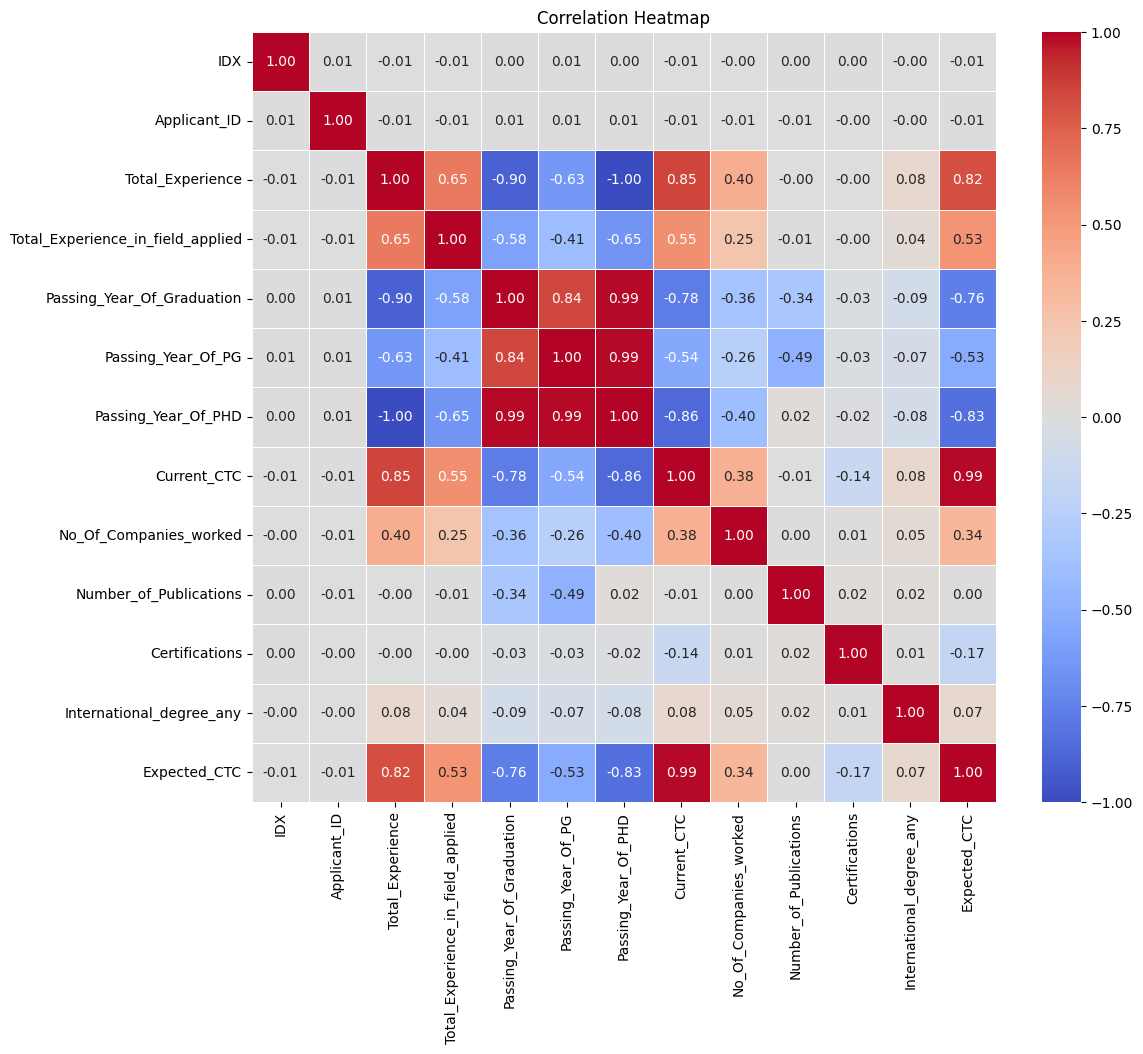

In [9]:
#Correlation Heatmap for numerical features
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=[np.number])
data = numeric_df.corr()
sns.heatmap(data, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

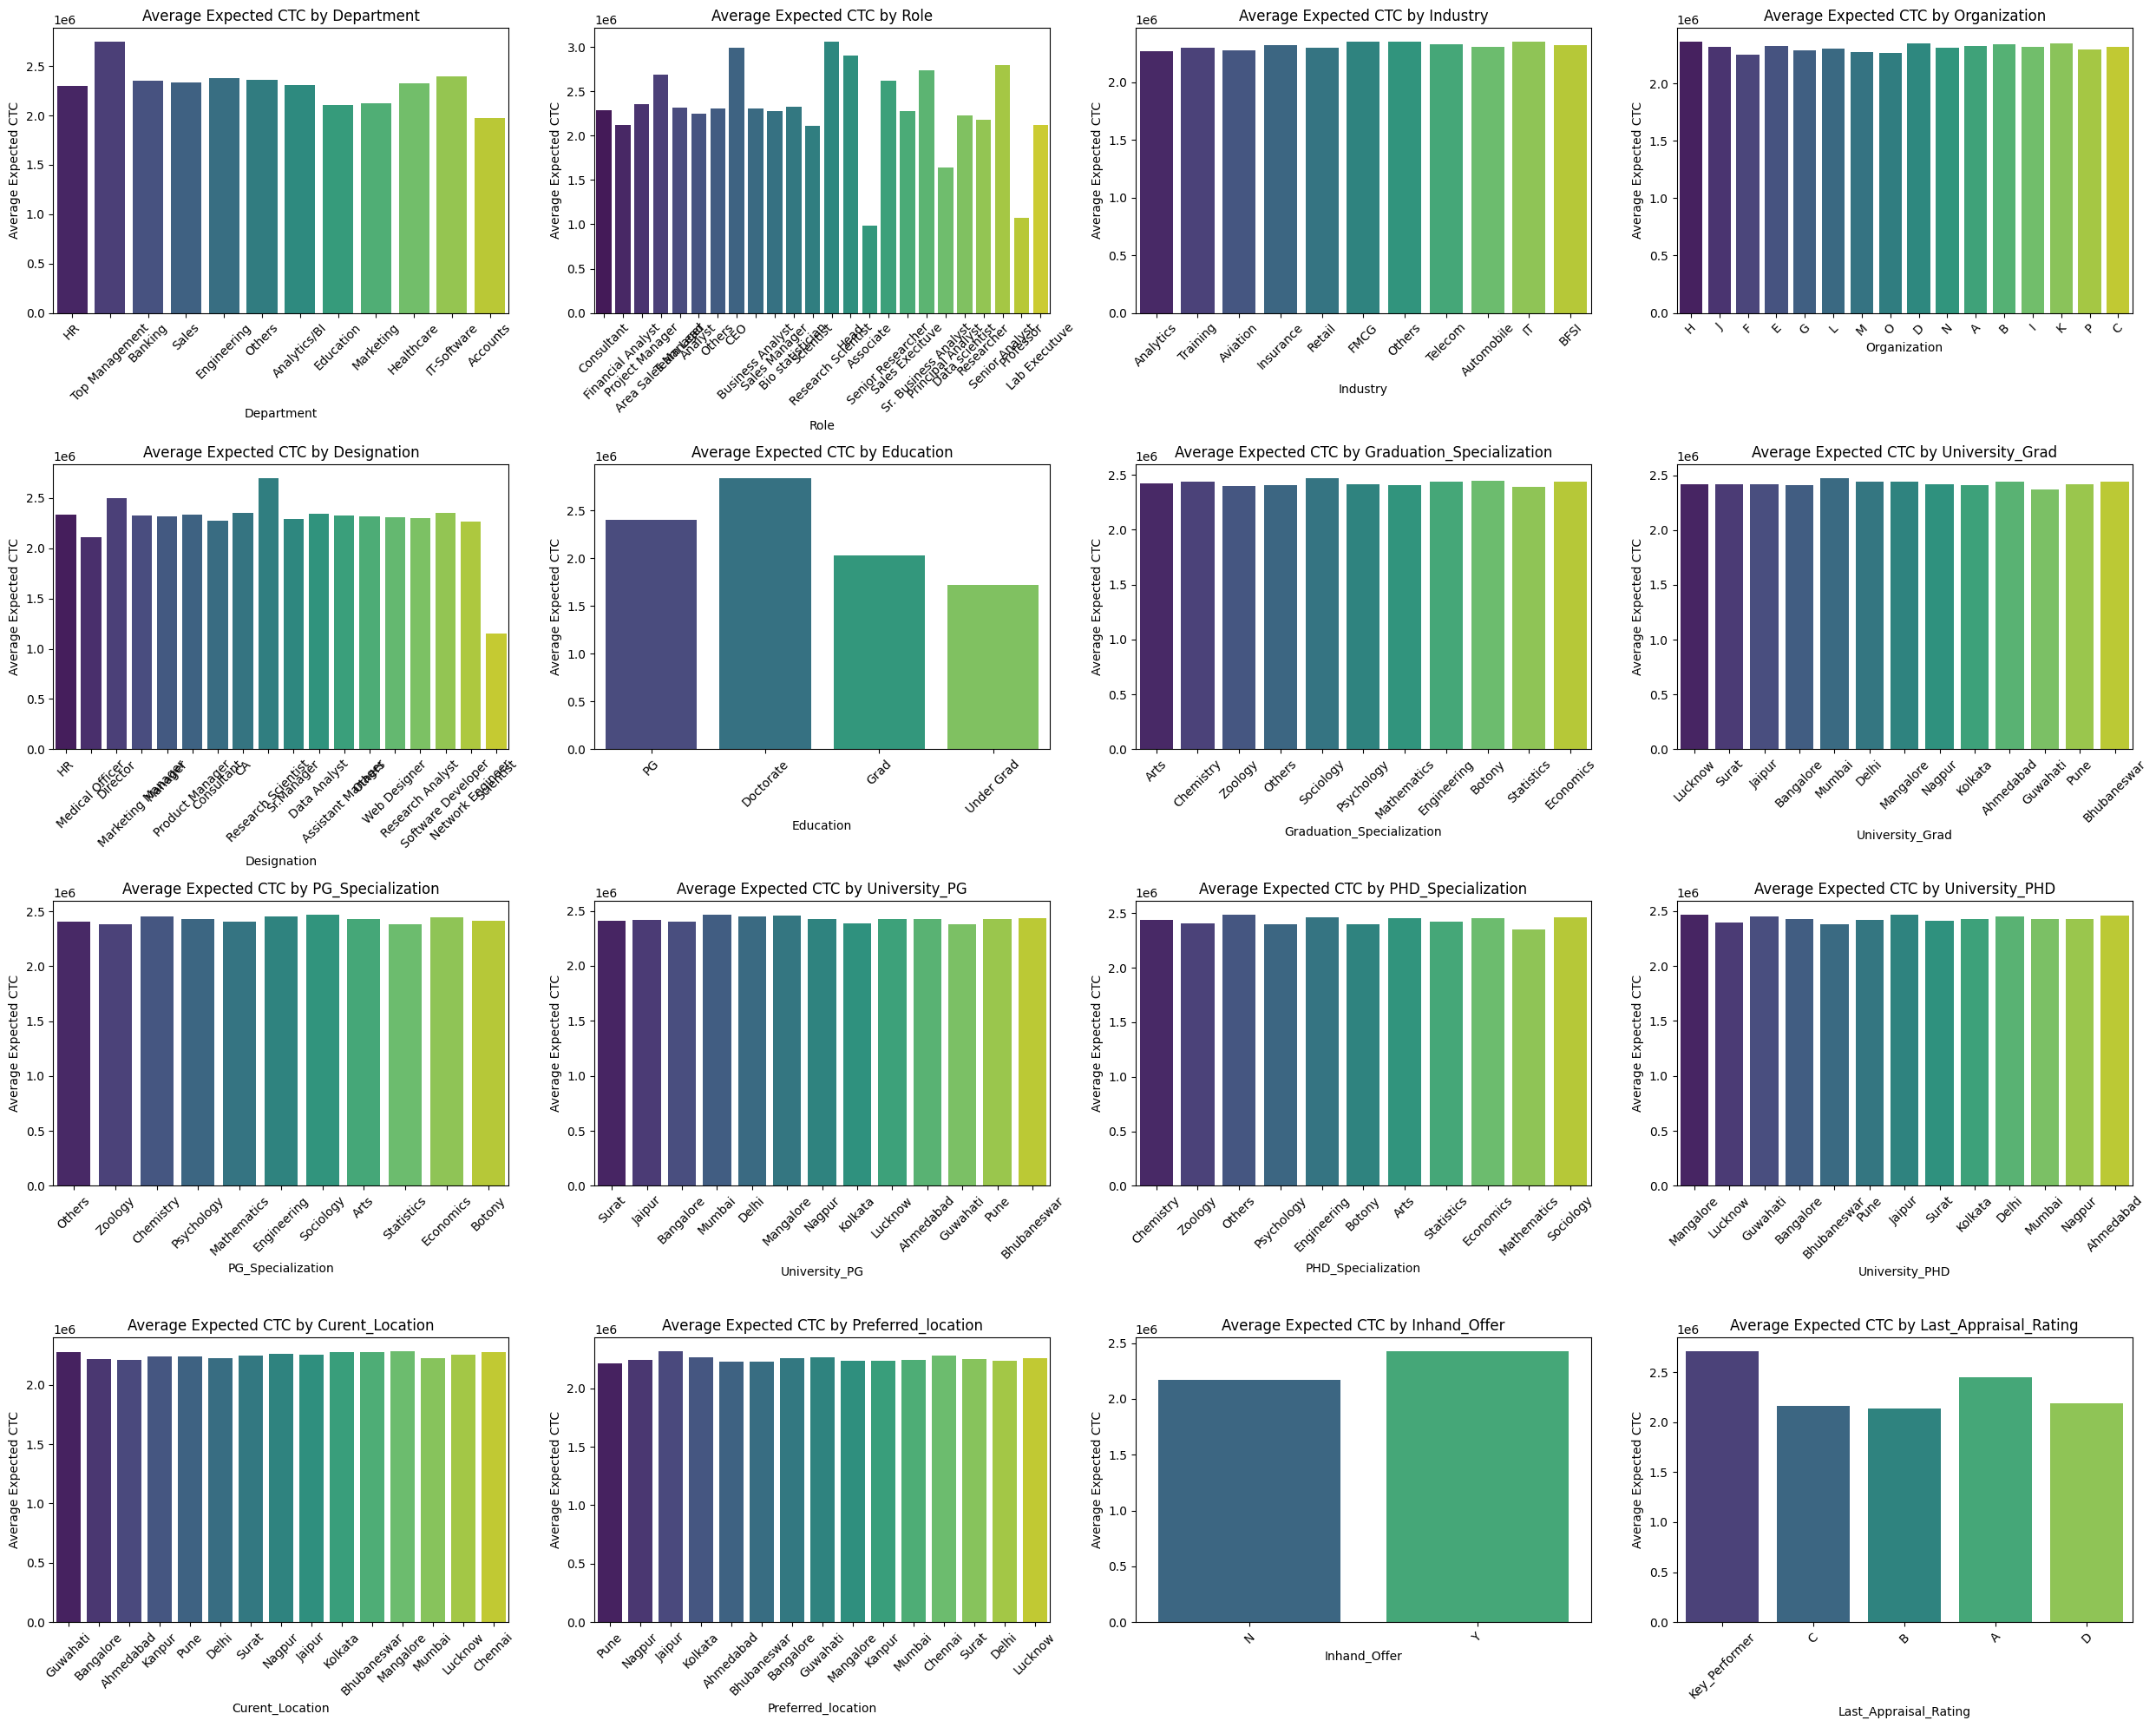

In [10]:
#Comparing Expected CTC Based on Different Categorical Features Using Bar Plots
cat_cols = df.select_dtypes(include='object').columns

plt.figure(figsize=(25, 20))
for i, column in enumerate(cat_cols):
    plt.subplot(4,4, i + 1)
    sns.barplot(x=df[column], y=df['Expected_CTC'], errorbar=None, palette='viridis')
    plt.title(f'Average Expected CTC by {column}')
    plt.xlabel(column)
    plt.ylabel('Average Expected CTC')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

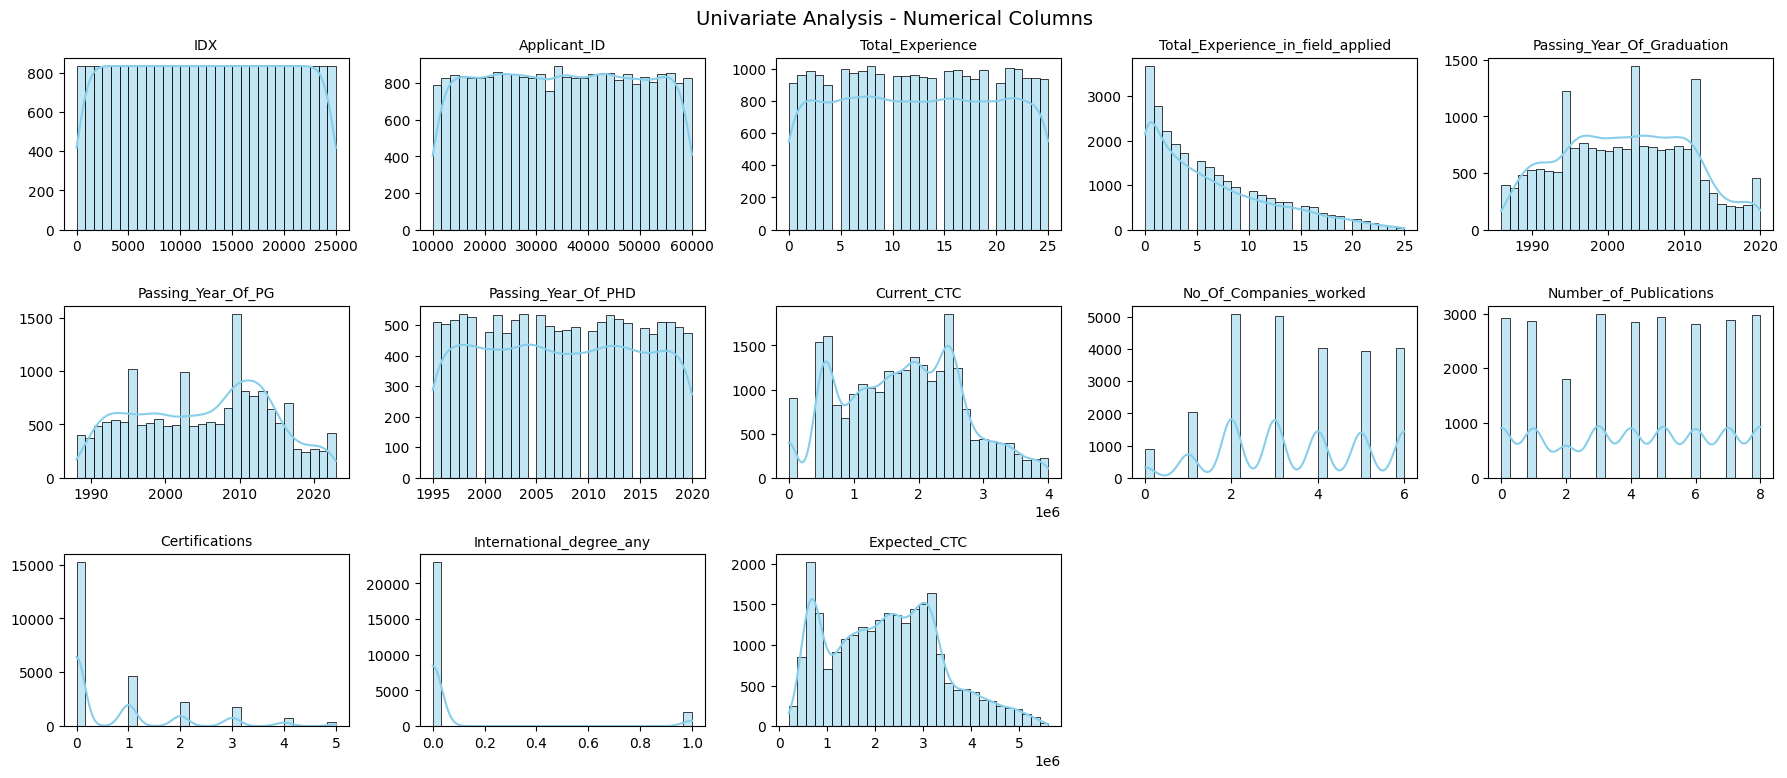

In [11]:
#Univariate Analysis(Numerical variables)
num_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(18, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 5, i)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(col, fontsize=10)
    plt.xlabel("")
    plt.ylabel("")
plt.suptitle("Univariate Analysis - Numerical Columns", fontsize=14)
plt.tight_layout()
plt.show()

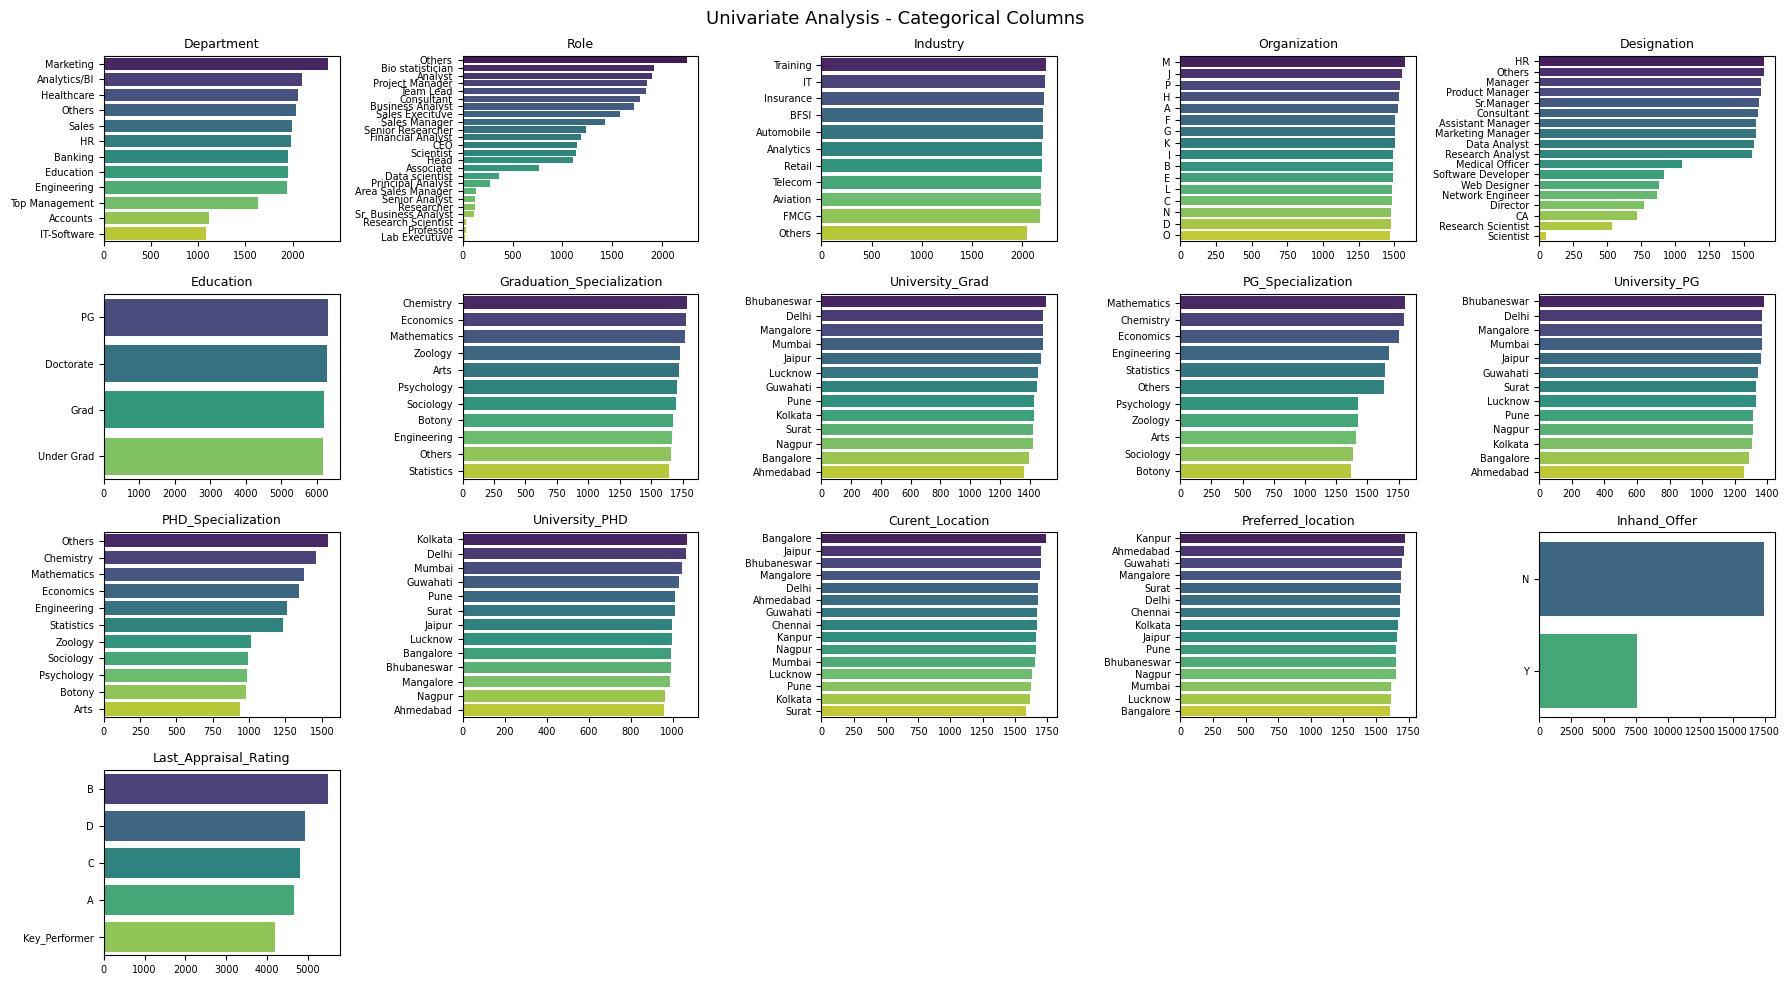

In [12]:
#Univariate analysis (Categorical variables)
cat_cols = df.select_dtypes(include='object').columns

plt.figure(figsize=(18, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 5, i)
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')
    plt.title(col, fontsize=9)
    plt.xlabel("", fontsize=8)
    plt.ylabel("", fontsize=8)
    plt.tick_params(axis='y', labelsize=7)
    plt.tick_params(axis='x', labelsize=7)
plt.suptitle("Univariate Analysis - Categorical Columns", fontsize=13)
plt.tight_layout()
plt.show()

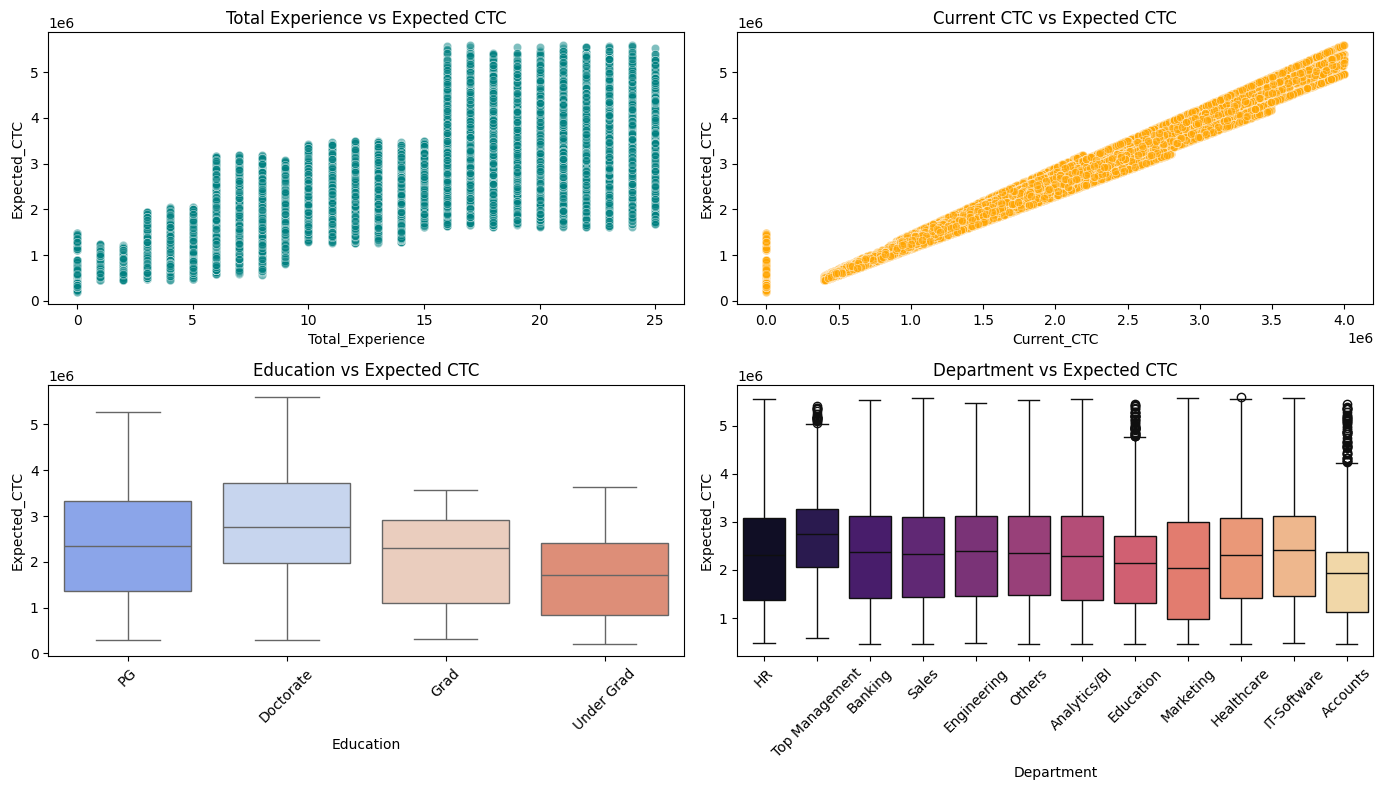

In [13]:
#Bivariate Analysis
target_col = 'Expected_CTC'
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

sns.scatterplot(x='Total_Experience', y=target_col, data=df, alpha=0.5, color='teal', ax=axes[0,0])
axes[0,0].set_title("Total Experience vs Expected CTC")

sns.scatterplot(x='Current_CTC', y=target_col, data=df, alpha=0.5, color='orange', ax=axes[0,1])
axes[0,1].set_title("Current CTC vs Expected CTC")

sns.boxplot(x='Education', y=target_col, data=df, palette='coolwarm', ax=axes[1,0])
axes[1,0].set_title("Education vs Expected CTC")
axes[1,0].tick_params(axis='x', rotation=45)

sns.boxplot(x='Department', y=target_col, data=df, palette='magma', ax=axes[1,1])
axes[1,1].set_title("Department vs Expected CTC")
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

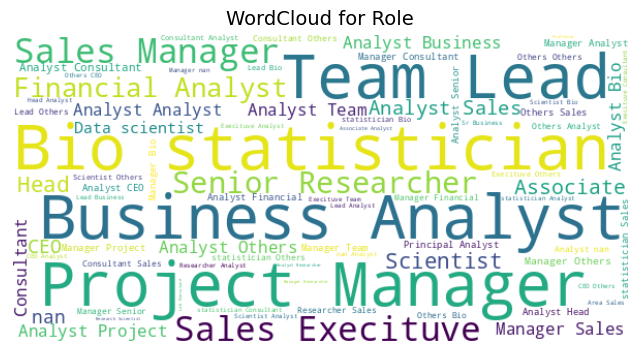

In [14]:
#Wordcloud for 'Role'
from wordcloud import WordCloud
plt.figure(figsize=(8, 5))
text = ' '.join(df['Role'].astype(str))
wordcloud = WordCloud(width=600, height=300, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Role", fontsize=14)
plt.show()

##4. Data Preprocessing

In [15]:
#drop the column which is not required
df.drop(['IDX'],axis=1,inplace=True)
df.drop(['Applicant_ID'],axis=1,inplace=True)

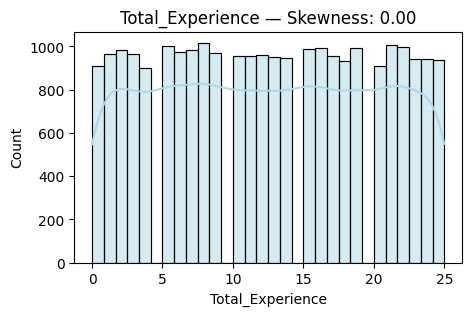

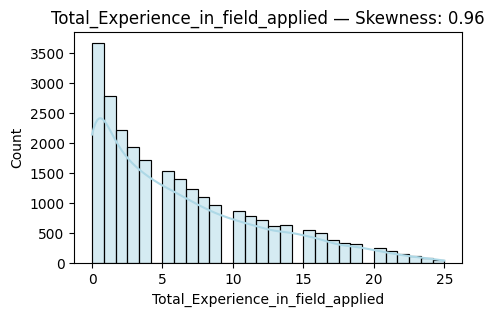

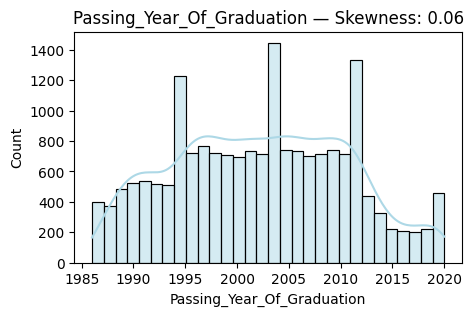

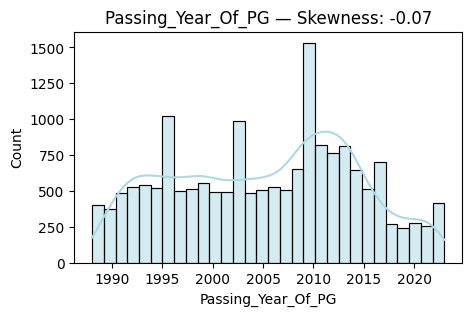

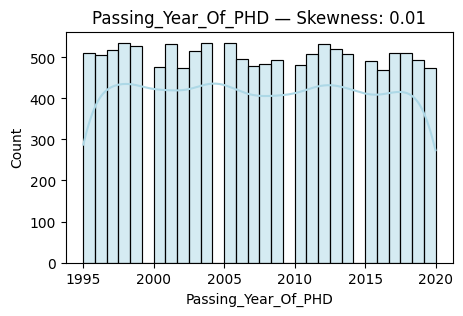

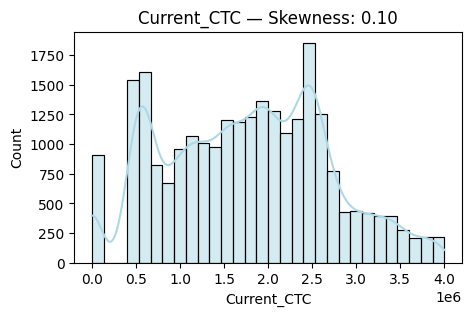

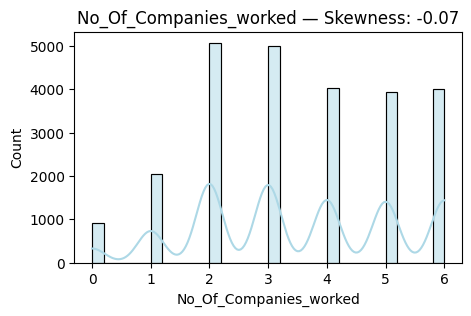

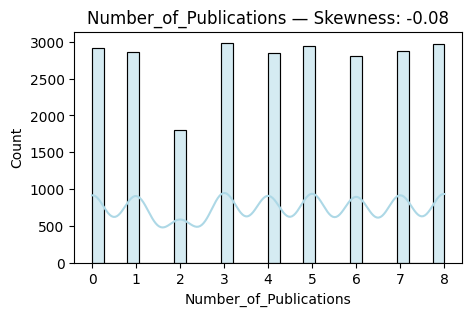

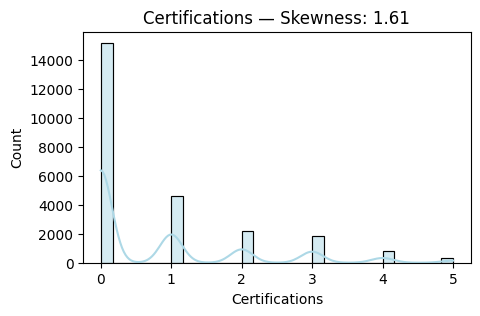

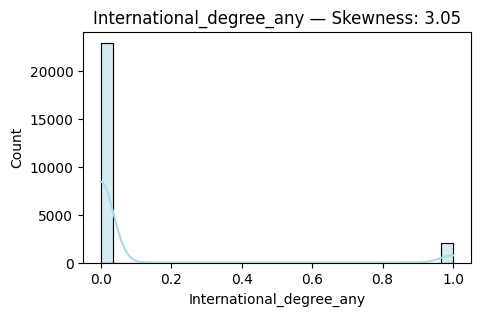

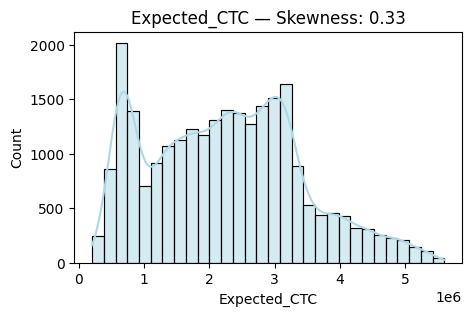


 Missing Values After Filling:
Total_Experience                     0
Total_Experience_in_field_applied    0
Department                           0
Role                                 0
Industry                             0
Organization                         0
Designation                          0
Education                            0
Graduation_Specialization            0
University_Grad                      0
Passing_Year_Of_Graduation           0
PG_Specialization                    0
University_PG                        0
Passing_Year_Of_PG                   0
PHD_Specialization                   0
University_PHD                       0
Passing_Year_Of_PHD                  0
Curent_Location                      0
Preferred_location                   0
Current_CTC                          0
Inhand_Offer                         0
Last_Appraisal_Rating                0
No_Of_Companies_worked               0
Number_of_Publications               0
Certifications                  

In [16]:
# ----------Handling missing values----------
# Separate columns by data type
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns

# 1. Fill categorical missing values with mode (most frequent value)
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

#For numeric columns — use mean for normal data, median for skewed data
num_cols = df.select_dtypes(exclude='object').columns

for col in num_cols:
    skew_val = df[col].skew()

    # Plot histogram for visual check (optional)
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], bins=30, kde=True, color='lightblue')
    plt.title(f"{col} — Skewness: {skew_val:.2f}")
    plt.show()

df['Passing_Year_Of_Graduation'].fillna(df['Passing_Year_Of_Graduation'].mean(), inplace=True)
df['Passing_Year_Of_PG'].fillna(df['Passing_Year_Of_PG'].median(), inplace=True)
df['Passing_Year_Of_PHD'].fillna(df['Passing_Year_Of_PHD'].mean(), inplace=True)

# Confirm all missing values handled
print("\n Missing Values After Filling:")
print(df.isnull().sum(), "missing values left in the dataset.")

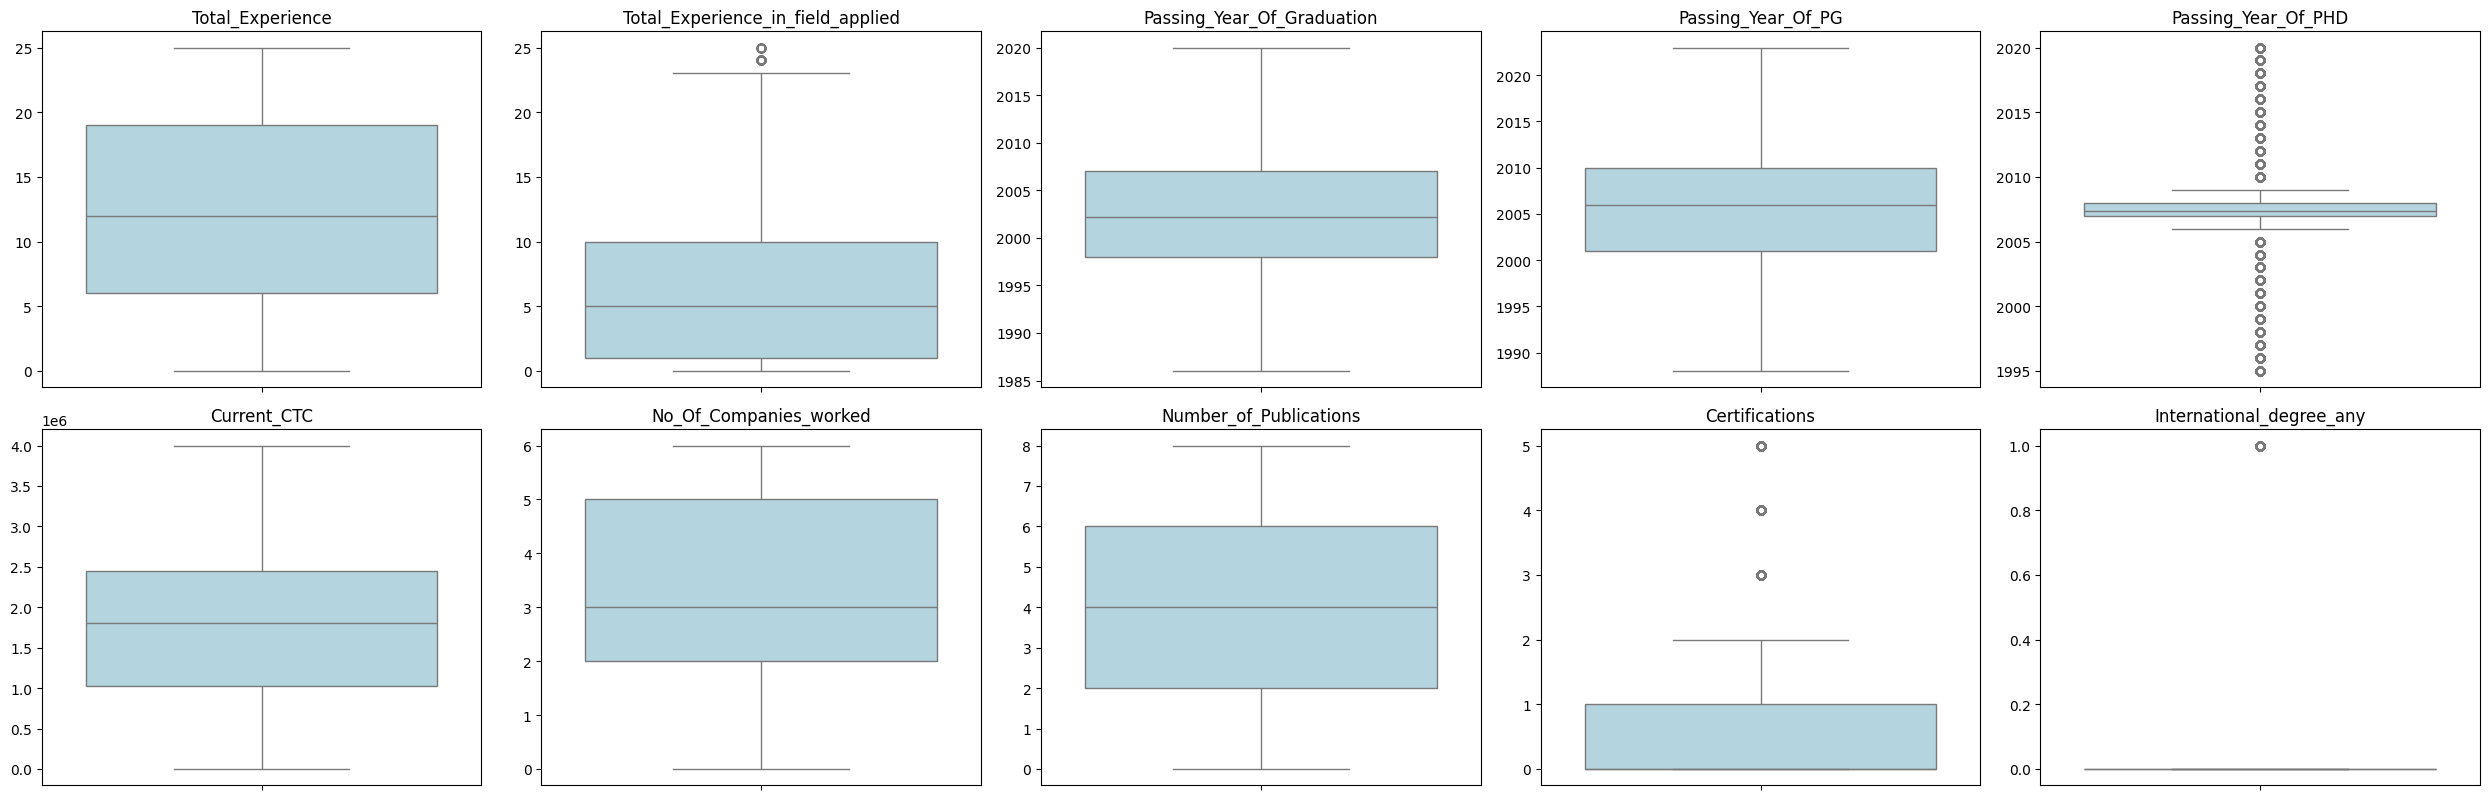

In [17]:
#Outlier Detection and Removal (IQR Method)
plt.figure(figsize=(25, 20))
# Select all numeric columns except the target variable
target_col = 'Expected_CTC'
num_cols = [col for col in df.select_dtypes(include=np.number).columns if col != target_col]

# Plot boxplots for each numeric column
for i, column in enumerate(num_cols, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=df[column], color='lightblue')
    plt.title(column)
    plt.ylabel("")

plt.tight_layout()
plt.show()

In [18]:
#Capping Outlier values
def find_iqr_bounds(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return lower_bound, upper_bound

# Apply capping for all numeric columns except target
target_col = 'Expected_CTC'
num_cols = [col for col in df.select_dtypes(include=np.number).columns if col != target_col]

# Exclude binary/discrete columns
binary_cols = [col for col in num_cols if df[col].nunique() <= 2]
num_cols = [col for col in num_cols if col not in binary_cols]

print("Outlier capping will be applied on these columns only:")
print(num_cols)

# Apply your IQR capping function again only on valid numeric columns
for col in num_cols:
    lower, upper = find_iqr_bounds(df[col])
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

print("✅ Outlier capping re-applied (binary columns excluded).")

Outlier capping will be applied on these columns only:
['Total_Experience', 'Total_Experience_in_field_applied', 'Passing_Year_Of_Graduation', 'Passing_Year_Of_PG', 'Passing_Year_Of_PHD', 'Current_CTC', 'No_Of_Companies_worked', 'Number_of_Publications', 'Certifications']
✅ Outlier capping re-applied (binary columns excluded).


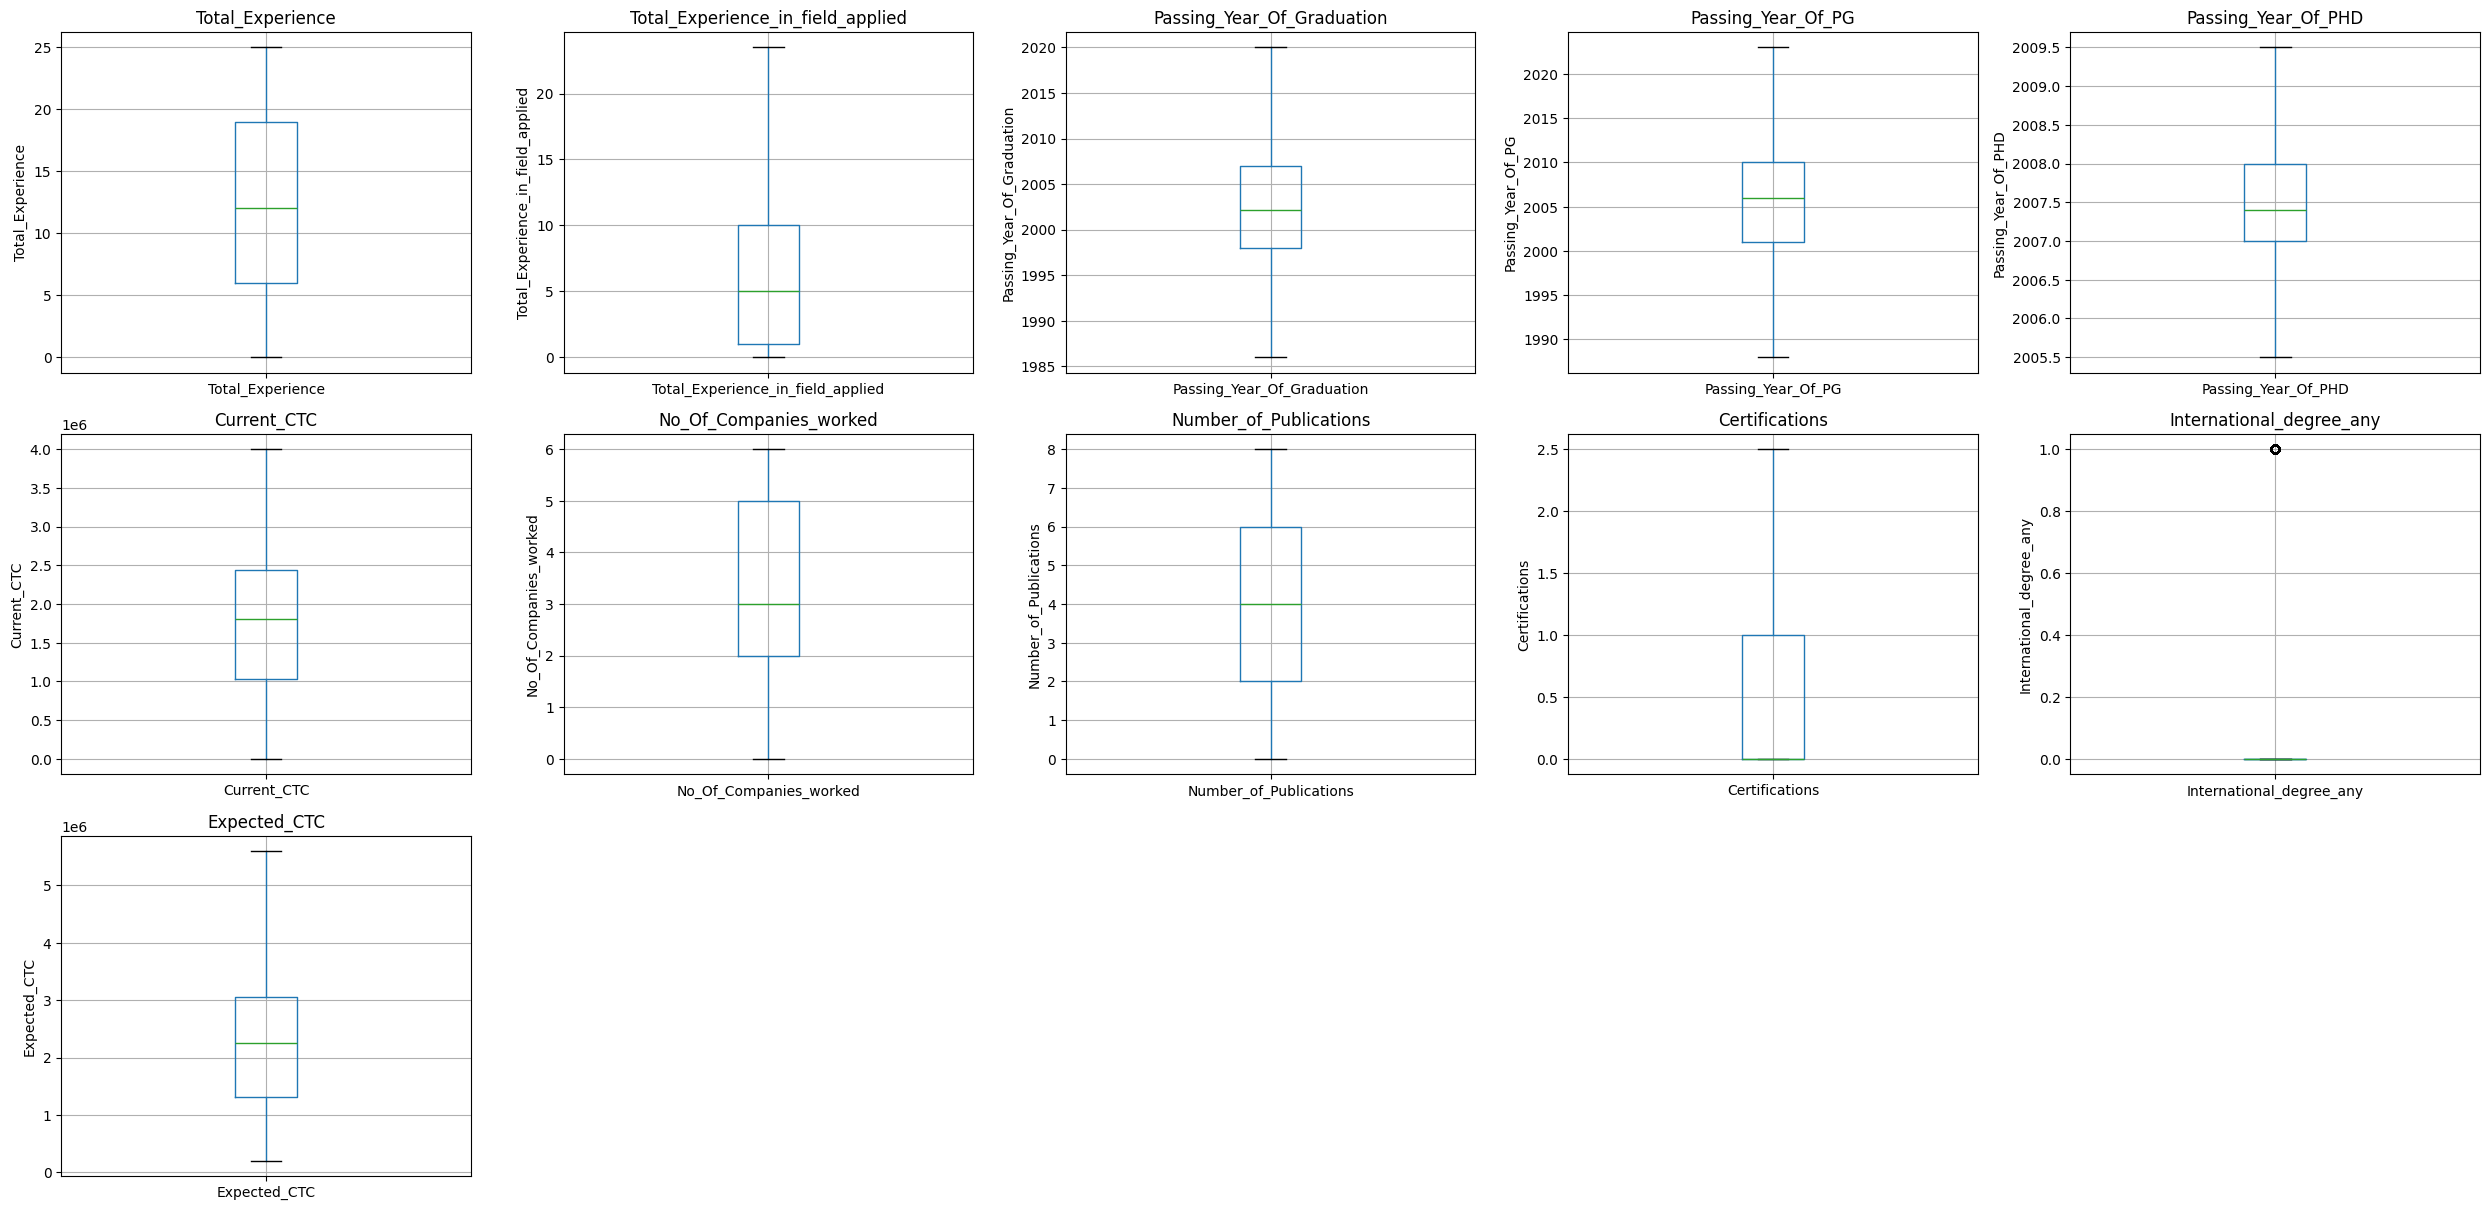

In [19]:
#Checking For Outliers After Treatment
plt.figure(figsize=(25, 20))
num_cols = df.select_dtypes(include=np.number).columns

for i, column in enumerate(num_cols):
    plt.subplot(5, 5, i + 1)
    df.boxplot(column=column)
    plt.title(column)
    plt.ylabel(column)

plt.tight_layout()
plt.show()

Outliers capped.

In [20]:
# Encoding all Categorical values using LabelEncoding
from sklearn.preprocessing import LabelEncoder
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0.0,0.0,8,11,10,12,5,2,0,7,...,5,13,0.0,0,1,0.0,0.0,0.0,0,384551
1,23.0,14.0,5,6,0,7,5,0,2,12,...,1,12,2702664.0,1,4,2.0,4.0,0.0,0,3783729
2,21.0,12.0,11,6,10,9,5,0,10,5,...,0,6,2236661.0,1,4,5.0,3.0,0.0,0,3131325
3,15.0,8.0,2,8,2,5,5,0,6,1,...,7,8,2100510.0,0,2,5.0,3.0,0.0,0,2608833
4,10.0,5.0,10,14,6,4,8,1,10,9,...,0,0,1931644.0,0,2,2.0,3.0,0.0,0,2221390


In [21]:
# Define the target column
target_col = 'Expected_CTC'

# Separate features (X) and target (y)
X = df.drop(columns=[target_col])
y = df[target_col]

In [22]:
#Test Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20000, 26), (5000, 26), (20000,), (5000,))

In [24]:
#Feature Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##5. Model Building and Evaluation
We’ll start simple with three core regression models:
* Linear Regression

* Random Forest Regressor

* XGBoost Regressor

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [26]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, eval_metric='rmse')
}


In [27]:
# Train and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results[name] = [r2, mae, rmse]

    print(f"\n📊 {name} Results:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")



📊 Linear Regression Results:
R² Score: 0.9811
MAE: 118770.68
RMSE: 159943.61

📊 Random Forest Results:
R² Score: 0.9995
MAE: 12956.26
RMSE: 25084.11

📊 XGBoost Results:
R² Score: 0.9996
MAE: 11835.24
RMSE: 21895.96


In [28]:
# Display summary table
results_df = pd.DataFrame(results, index=["R² Score", "MAE", "RMSE"]).T
display(results_df.sort_values(by="R² Score", ascending=False))

,R² Score,MAE,RMSE
XGBoost,0.999646,11835.235352,21895.962733
Random Forest,0.999535,12956.260450,25084.111349
Linear Regression,0.981085,118770.679134,159943.605535


### Conclusion:
   - XGBoost gives the best results overall and will be selected
     for further fine-tuning using Hyperparameter Optimization.

##6. Hyperparameter Tuning (XGBoost)

In [29]:
from sklearn.model_selection import RandomizedSearchCV
# Base model
xgb = XGBRegressor(random_state=42, eval_metric='rmse')

# ✅ Define hyperparameter search space
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'min_child_weight': [1, 3, 5]
}

# ✅ Initialize RandomizedSearchCV
xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,                # number of combinations to try
    scoring='r2',
    cv=3,                     # 3-fold cross validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# ✅ Fit on training data
xgb_random.fit(X_train_scaled, y_train)

# ✅ Display best parameters and score
print("\n🏆 Best Parameters found:")
print(xgb_random.best_params_)

print(f"\n📈 Best Cross-Validation R² Score: {xgb_random.best_score_:.4f}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits

🏆 Best Parameters found:
{'subsample': 0.8, 'n_estimators': 400, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}

📈 Best Cross-Validation R² Score: 0.9996


Interpretation:

The parameters show your model is well-regularized.

CV R² = 0.9996 means it’s extremely consistent across folds (not overfitting heavily).

###7. Final Model Training & Evaluation (Tuned XGBoost)

In [30]:
#  Train XGBoost with best parameters found
best_xgb = XGBRegressor(
    n_estimators=400,
    learning_rate=0.1,
    max_depth=7,
    min_child_weight=5,
    subsample=0.8,
    colsample_bytree=1.0,
    gamma=0.1,
    random_state=42,
    eval_metric='rmse'
)

# Fit model on training data
best_xgb.fit(X_train_scaled, y_train)

# ✅ Predict on test set
y_pred_xgb = best_xgb.predict(X_test_scaled)

# ✅ Evaluate model
r2 = r2_score(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("\n🏆 Tuned XGBoost Final Performance on Test Data:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


🏆 Tuned XGBoost Final Performance on Test Data:
R² Score: 0.9997
MAE: 9774.34
RMSE: 20263.04


##8. Model Saving & Deployment Preparation

In [34]:
import pickle

# Save the trained XGBoost model
pickle.dump(best_xgb, open("expected_ctc_model.pkl", "wb"))
print("✅ Model saved successfully as 'expected_ctc_model.pkl'")

# Save the StandardScaler too (for use during prediction)
pickle.dump(scaler, open("scaler.pkl", "wb"))
print("✅ Scaler saved successfully as 'scaler.pkl'")

# Save the list of feature names (columns used for model training)
pickle.dump(X.columns.tolist(), open("feature_names.pkl", "wb"))
print("✅ featurename saved successfully as 'feature_names.pkl'")

✅ Model saved successfully as 'expected_ctc_model.pkl'
✅ Scaler saved successfully as 'scaler.pkl'
✅ featurename saved successfully as 'feature_names.pkl'


In [35]:
from google.colab import files

# Download the saved model and scaler
files.download("expected_ctc_model.pkl")
files.download("scaler.pkl")
files.download("feature_names.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>